# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [115]:
import pandas as pd
import requests
import tweepy
import os
import json
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt


# load twitter-archive-enhanced.csv file

we_rate_dogs_archive = pd.read_csv('twitter-archive-enhanced.csv')

we_rate_dogs_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [2]:
we_rate_dogs_archive.shape

(2356, 17)

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# download and save the image-predictions.tsv file
file_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'

try:
    res = requests.get(file_url)
    with open('image-predictions.tsv', 'wb') as f:
        f.write(res.content)
except:
    print("Couldn't establish connection.")
    
# load the file in a data frame
try:
    img_preds = pd.read_csv('image-predictions.tsv', sep='\t')
except:
    print("file doesn't exist.")

In [4]:
img_preds.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [5]:
img_preds.shape

(2075, 12)

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
# connect to the twitter api to query additional data

consumer_key = os.environ.get('PRIVATE_API_KEY')
consumer_secret = os.environ.get('PRIVATE_API_SECRET')
access_token = os.environ.get('PRIVATE_ACCESS_TOKEN')
access_secret = os.environ.get('PRIVATE_ACCESS_SECRET')

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [5]:
import time
# get data for each twitter id in we_rate_dogs.tweet_id and save it in tweet_json.txt
start = time.time()
for tid in we_rate_dogs_archive.tweet_id:
    try:
        with open('tweet_json.txt', 'a') as f:
            status = api.get_status(str(tid))
            print(f'writing {tid} to file')
            json.dump(status._json, f)
            f.write('\n')
    except:
        with open('missing_data.txt', 'a') as f:
            print(f"Couldn't retrieve data for {tid}")
            f.write(str(tid)+'\n')
end = time.time()
print(end-start)

writing 892420643555336193 to file
writing 892177421306343426 to file
writing 891815181378084864 to file
writing 891689557279858688 to file
writing 891327558926688256 to file
writing 891087950875897856 to file
writing 890971913173991426 to file
writing 890729181411237888 to file
writing 890609185150312448 to file
writing 890240255349198849 to file
writing 890006608113172480 to file
writing 889880896479866881 to file
writing 889665388333682689 to file
writing 889638837579907072 to file
writing 889531135344209921 to file
writing 889278841981685760 to file
writing 888917238123831296 to file
writing 888804989199671297 to file
writing 888554962724278272 to file
Couldn't retrieve data for 888202515573088257
writing 888078434458587136 to file
writing 887705289381826560 to file
writing 887517139158093824 to file
writing 887473957103951883 to file
writing 887343217045368832 to file
writing 887101392804085760 to file
writing 886983233522544640 to file
writing 886736880519319552 to file
writing 8

writing 847971574464610304 to file
writing 847962785489326080 to file
writing 847842811428974592 to file
writing 847617282490613760 to file
writing 847606175596138505 to file
writing 847251039262605312 to file
writing 847157206088847362 to file
writing 847116187444137987 to file
writing 846874817362120707 to file
writing 846514051647705089 to file
writing 846505985330044928 to file
writing 846153765933735936 to file
writing 846139713627017216 to file
writing 846042936437604353 to file
writing 845812042753855489 to file
writing 845677943972139009 to file
Couldn't retrieve data for 845459076796616705
writing 845397057150107648 to file
writing 845306882940190720 to file
writing 845098359547420673 to file
writing 844979544864018432 to file
writing 844973813909606400 to file
Couldn't retrieve data for 844704788403113984
writing 844580511645339650 to file
writing 844223788422217728 to file
writing 843981021012017153 to file
writing 843856843873095681 to file
writing 843604394117681152 to fil

writing 817423860136083457 to file
writing 817415592588222464 to file
writing 817181837579653120 to file
writing 817171292965273600 to file
writing 817120970343411712 to file
writing 817056546584727552 to file
writing 816829038950027264 to file
writing 816816676327063552 to file
writing 816697700272001025 to file
writing 816450570814898180 to file
writing 816336735214911488 to file
writing 816091915477250048 to file
writing 816062466425819140 to file
writing 816014286006976512 to file
writing 815990720817401858 to file
writing 815966073409433600 to file
writing 815745968457060357 to file
writing 815736392542261248 to file
writing 815639385530101762 to file
writing 815390420867969024 to file
writing 814986499976527872 to file
writing 814638523311648768 to file
writing 814578408554463233 to file
writing 814530161257443328 to file
writing 814153002265309185 to file
writing 813944609378369540 to file
writing 813910438903693312 to file
writing 813812741911748608 to file
writing 813800681631

writing 786595970293370880 to file
writing 786363235746385920 to file
writing 786286427768250368 to file
writing 786233965241827333 to file
writing 786051337297522688 to file
writing 786036967502913536 to file
writing 785927819176054784 to file
writing 785872687017132033 to file
writing 785639753186217984 to file
writing 785533386513321988 to file
writing 785515384317313025 to file
writing 785264754247995392 to file
writing 785170936622350336 to file
writing 784826020293709826 to file
writing 784517518371221505 to file
writing 784431430411685888 to file
writing 784183165795655680 to file
writing 784057939640352768 to file
writing 783839966405230592 to file
writing 783821107061198850 to file
writing 783695101801398276 to file
writing 783466772167098368 to file
writing 783391753726550016 to file
writing 783347506784731136 to file
writing 783334639985389568 to file
writing 783085703974514689 to file
writing 782969140009107456 to file
writing 782747134529531904 to file
writing 782722598790

writing 754482103782404096 to file
writing 754449512966619136 to file
writing 754120377874386944 to file
Couldn't retrieve data for 754011816964026368
writing 753655901052166144 to file
writing 753420520834629632 to file
writing 753398408988139520 to file
writing 753375668877008896 to file
writing 753298634498793472 to file
writing 753294487569522689 to file
writing 753039830821511168 to file
writing 753026973505581056 to file
writing 752932432744185856 to file
writing 752917284578922496 to file
writing 752701944171524096 to file
writing 752682090207055872 to file
writing 752660715232722944 to file
writing 752568224206688256 to file
writing 752519690950500352 to file
writing 752334515931054080 to file
writing 752309394570878976 to file
writing 752173152931807232 to file
writing 751950017322246144 to file
writing 751937170840121344 to file
writing 751830394383790080 to file
writing 751793661361422336 to file
writing 751598357617971201 to file
writing 751583847268179968 to file
writing 7

writing 723673163800948736 to file
writing 723179728551723008 to file
writing 722974582966214656 to file
writing 722613351520608256 to file
writing 721503162398597120 to file
writing 721001180231503872 to file
writing 720785406564900865 to file
writing 720775346191278080 to file
writing 720415127506415616 to file
writing 720389942216527872 to file
writing 720340705894408192 to file
writing 720059472081784833 to file
writing 720043174954147842 to file
writing 719991154352222208 to file
writing 719704490224398336 to file
writing 719551379208073216 to file
writing 719367763014393856 to file
writing 719339463458033665 to file
writing 719332531645071360 to file
writing 718971898235854848 to file
writing 718939241951195136 to file
writing 718631497683582976 to file
writing 718613305783398402 to file
writing 718540630683709445 to file
writing 718460005985447936 to file
writing 718454725339934721 to file
writing 718246886998687744 to file
writing 718234618122661888 to file
writing 717841801130

writing 699775878809702401 to file
writing 699691744225525762 to file
writing 699446877801091073 to file
writing 699434518667751424 to file
writing 699423671849451520 to file
writing 699413908797464576 to file
writing 699370870310113280 to file
writing 699323444782047232 to file
writing 699088579889332224 to file
writing 699079609774645248 to file
writing 699072405256409088 to file
writing 699060279947165696 to file
writing 699036661657767936 to file
writing 698989035503689728 to file
writing 698953797952008193 to file
writing 698907974262222848 to file
writing 698710712454139905 to file
writing 698703483621523456 to file
writing 698635131305795584 to file
writing 698549713696649216 to file
writing 698355670425473025 to file
writing 698342080612007937 to file
writing 698262614669991936 to file
writing 698195409219559425 to file
writing 698178924120031232 to file
writing 697995514407682048 to file
writing 697990423684476929 to file
writing 697943111201378304 to file
writing 697881462549

writing 684241637099323392 to file
writing 684225744407494656 to file
writing 684222868335505415 to file
writing 684200372118904832 to file
writing 684195085588783105 to file
writing 684188786104872960 to file
writing 684177701129875456 to file
writing 684147889187209216 to file
writing 684122891630342144 to file
writing 684097758874210310 to file
writing 683857920510050305 to file
writing 683852578183077888 to file
writing 683849932751646720 to file
writing 683834909291606017 to file
writing 683828599284170753 to file
writing 683773439333797890 to file
writing 683742671509258241 to file
writing 683515932363329536 to file
writing 683498322573824003 to file
writing 683481228088049664 to file
writing 683462770029932544 to file
writing 683449695444799489 to file
writing 683391852557561860 to file
writing 683357973142474752 to file
writing 683142553609318400 to file
writing 683111407806746624 to file
writing 683098815881154561 to file
writing 683078886620553216 to file
writing 683030066213

writing 675334060156301312 to file
writing 675166823650848770 to file
writing 675153376133427200 to file
writing 675149409102012420 to file
writing 675147105808306176 to file
writing 675146535592706048 to file
writing 675145476954566656 to file
writing 675135153782571009 to file
writing 675113801096802304 to file
writing 675111688094527488 to file
writing 675109292475830276 to file
writing 675047298674663426 to file
writing 675015141583413248 to file
writing 675006312288268288 to file
writing 675003128568291329 to file
writing 674999807681908736 to file
writing 674805413498527744 to file
writing 674800520222154752 to file
writing 674793399141146624 to file
writing 674790488185167872 to file
writing 674788554665512960 to file
writing 674781762103414784 to file
writing 674774481756377088 to file
writing 674767892831932416 to file
writing 674764817387900928 to file
writing 674754018082705410 to file
writing 674752233200820224 to file
writing 674743008475090944 to file
writing 674742531037

writing 670679630144274432 to file
writing 670676092097810432 to file
writing 670668383499735048 to file
writing 670474236058800128 to file
writing 670468609693655041 to file
writing 670465786746662913 to file
writing 670452855871037440 to file
writing 670449342516494336 to file
writing 670444955656130560 to file
writing 670442337873600512 to file
writing 670435821946826752 to file
writing 670434127938719744 to file
writing 670433248821026816 to file
writing 670428280563085312 to file
writing 670427002554466305 to file
writing 670421925039075328 to file
writing 670420569653809152 to file
writing 670417414769758208 to file
writing 670411370698022913 to file
writing 670408998013820928 to file
writing 670403879788544000 to file
writing 670385711116361728 to file
writing 670374371102445568 to file
writing 670361874861563904 to file
writing 670338931251150849 to file
writing 670319130621435904 to file
writing 670303360680108032 to file
writing 670290420111441920 to file
writing 670093938074

writing 666268910803644416 to file
writing 666104133288665088 to file
writing 666102155909144576 to file
writing 666099513787052032 to file
writing 666094000022159362 to file
writing 666082916733198337 to file
writing 666073100786774016 to file
writing 666071193221509120 to file
writing 666063827256086533 to file
writing 666058600524156928 to file
writing 666057090499244032 to file
writing 666055525042405380 to file
writing 666051853826850816 to file
writing 666050758794694657 to file
writing 666049248165822465 to file
writing 666044226329800704 to file
writing 666033412701032449 to file
writing 666029285002620928 to file
writing 666020888022790149 to file
2912.2526199817657


In [6]:
# create a new dataframe from tweet data in tweet_json.txt

# tweets dictionary containing relevant information we need to extract from the json
tweets = {'tweet_id':[], 'quoted_status_id':[], 'retweet_count': [], 'favorite_count': []}
# serialize tweet_json.txt
with open('tweet_json.txt') as f:
    for line in f:
        data = json.loads(line)
        for key in data:
            if key in tweets:
                tweets[key].append(data[key])
            elif key=='id':
                tweets['tweet_id'].append(data[key])
            elif key=='is_quote_status' and 'quoted_status_id' not in data:
                tweets['quoted_status_id'].append(np.nan)

In [7]:
# confirm all keys have equal number of values

[print(key, len(value)) for key, value in tweets.items()]

tweet_id 2327
quoted_status_id 2327
retweet_count 2327
favorite_count 2327


[None, None, None, None]

In [8]:
# load to dataframe
tweet_df = pd.DataFrame(tweets)

tweet_df.head()

,tweet_id,quoted_status_id,retweet_count,favorite_count
0,892420643555336193,NaN,7010,33823
1,892177421306343426,NaN,5302,29337
2,891815181378084864,NaN,3482,22069
3,891689557279858688,NaN,7228,36949
4,891327558926688256,NaN,7764,35321


In [9]:
tweet_df.to_csv('tweets.csv', index=False)

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [10]:
we_rate_dogs_archive.head(100)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
96,873580283840344065,NaN,NaN,2017-06-10 16:39:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We usually don't rate Deck-bound Saskatoon Bla...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/873580283...,13,10,None,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None
98,873213775632977920,NaN,NaN,2017-06-09 16:22:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sierra. She's one precious pupper. Abs...,NaN,NaN,NaN,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


In [11]:
# noticed that the 98th record's expand_urls column comprises more than one url lumped as a single string
# let's check if there are cases like this in the dataframe.

we_rate_dogs_archive.expanded_urls.value_counts()

https://twitter.com/dog_rates/status/667152164079423490/photo/1                                                                                                                                                                                                    2
https://twitter.com/dog_rates/status/718631497683582976/photo/1                                                                                                                                                                                                    2
https://twitter.com/dog_rates/status/783839966405230592/photo/1,https://twitter.com/dog_rates/status/783839966405230592/photo/1,https://twitter.com/dog_rates/status/783839966405230592/photo/1                                                                    2
https://twitter.com/dog_rates/status/774314403806253056/photo/1,https://twitter.com/dog_rates/status/774314403806253056/photo/1,https://twitter.com/dog_rates/status/774314403806253056/photo/1,https://twitter.com/dog_r

In [12]:
we_rate_dogs_archive.tail(50)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2306,666835007768551424,NaN,NaN,2015-11-18 04:27:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",These are Peruvian Feldspars. Their names are ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666835007...,10,10,None,None,None,None,None
2307,666826780179869698,NaN,NaN,2015-11-18 03:54:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12/10 simply brilliant pup https://t.co/V6ZzG4...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666826780...,12,10,None,None,None,None,None
2308,666817836334096384,NaN,NaN,2015-11-18 03:18:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jeph. He is a German Boston Shuttlecoc...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666817836...,9,10,Jeph,None,None,None,None
2309,666804364988780544,NaN,NaN,2015-11-18 02:25:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jockson. He is a Pinnacle Sagittarius....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666804364...,8,10,Jockson,None,None,None,None
2310,666786068205871104,NaN,NaN,2015-11-18 01:12:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Unfamiliar with this breed. Ears pointy af. Wo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666786068...,2,10,None,None,None,None,None
2311,666781792255496192,NaN,NaN,2015-11-18 00:55:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Bacardi named Octaviath. Ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666781792...,10,10,a,None,None,None,None
2312,666776908487630848,NaN,NaN,2015-11-18 00:36:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Josep. He is a Rye Manganese mix. Can ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666776908...,5,10,Josep,None,None,None,None
2313,666739327293083650,NaN,NaN,2015-11-17 22:06:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lugan. He is a Bohemian Rhapsody. Very...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666739327...,10,10,Lugan,None,None,None,None
2314,666701168228331520,NaN,NaN,2015-11-17 19:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a golden Buckminsterfullerene named Jo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666701168...,8,10,a,None,None,None,None
2315,666691418707132416,NaN,NaN,2015-11-17 18:56:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Christoper. He is a spotted Penne. Can...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666691418...,8,10,Christoper,None,None,None,None


In [13]:
we_rate_dogs_archive.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [14]:
we_rate_dogs_archive[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [15]:
we_rate_dogs_archive.query('rating_denominator == 170')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None


In [16]:
we_rate_dogs_archive.query('rating_numerator == 1776')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None


In [17]:
we_rate_dogs_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [18]:
# check column infos

we_rate_dogs_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [19]:
we_rate_dogs_archive.duplicated().sum()

0

In [20]:
we_rate_dogs_archive[we_rate_dogs_archive.expanded_urls.isnull()].sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
1663,682808988178739200,6.827884e+17,4.196984e+09,2016-01-01 06:22:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I'm aware that I could've said 20/16, but here...",NaN,NaN,NaN,NaN,20,16,None,None,None,None,None
570,801854953262350336,8.018543e+17,1.185634e+07,2016-11-24 18:28:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",.@NBCSports OMG THE TINY HAT I'M GOING TO HAVE...,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None
1005,747651430853525504,7.476487e+17,4.196984e+09,2016-06-28 04:42:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Other pupper asked not to have his identity sh...,NaN,NaN,NaN,NaN,12,10,None,None,None,pupper,None


In [21]:
img_preds.head(100)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
95,667550904950915073,https://pbs.twimg.com/media/CUOb_gUUkAACXdS.jpg,1,web_site,0.999335,False,vizsla,0.000081,True,collie,0.000069,True
96,667724302356258817,https://pbs.twimg.com/media/CUQ7tv3W4AA3KlI.jpg,1,ibex,0.619098,False,bighorn,0.125119,False,ram,0.074673,False
97,667728196545200128,https://pbs.twimg.com/media/CUQ_QahUAAAVQjn.jpg,1,kuvasz,0.360159,True,golden_retriever,0.293744,True,Labrador_retriever,0.270673,True
98,667766675769573376,https://pbs.twimg.com/media/CURiQMnUAAAPT2M.jpg,1,fire_engine,0.883493,False,tow_truck,0.074734,False,jeep,0.012773,False


In [22]:
img_preds.tail(100)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1975,870063196459192321,https://pbs.twimg.com/media/DBMV3NnXUAAm0Pp.jpg,1,comic_book,0.534409,False,envelope,0.280722,False,book_jacket,0.043785,False
1976,870308999962521604,https://pbs.twimg.com/media/DBP1asiUAAEKZI5.jpg,2,Greater_Swiss_Mountain_dog,0.622752,True,Appenzeller,0.158463,True,EntleBucher,0.148115,True
1977,870374049280663552,https://pbs.twimg.com/media/DBQwlFCXkAACSkI.jpg,1,golden_retriever,0.841001,True,Great_Pyrenees,0.099278,True,Labrador_retriever,0.032621,True
1978,870656317836468226,https://pbs.twimg.com/media/DBUxSSTXsAA-Jn1.jpg,4,Pembroke,0.945495,True,Cardigan,0.045875,True,beagle,0.004329,True
1979,870804317367881728,https://pbs.twimg.com/media/DBW35ZsVoAEWZUU.jpg,1,home_theater,0.168290,False,sandbar,0.098040,False,television,0.079729,False
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [23]:
img_preds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [24]:
img_preds.duplicated().sum()

0

In [25]:
tweet_df.sample(5)

,tweet_id,quoted_status_id,retweet_count,favorite_count
2148,669037058363662336,NaN,266,573
2238,667524857454854144,NaN,969,1507
448,817171292965273600,NaN,1871,8315
1085,733109485275860992,NaN,15548,49369
425,819347104292290561,NaN,1116,6848


In [26]:
# retrieve deleted records

with open('missing_data.txt') as f:
    lines = [int(line) for line in set(f.readlines())]

# check if all records in the tweet_df table are in we_rate_dogs_archive table
we_rate_dogs_archive.query('tweet_id not in @lines').shape[0] == tweet_df.shape[0]

True

In [27]:
# number of deleted records in img_preds table

img_preds.query('tweet_id in @lines').shape

(18, 12)

In [28]:
# number of deleted records in we_rate_dogs_archive table

we_rate_dogs_archive.query('tweet_id in @lines').shape

(29, 17)

In [29]:
tweet_df.shape

(2327, 4)

In [30]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweet_id          2327 non-null   int64  
 1   quoted_status_id  26 non-null     float64
 2   retweet_count     2327 non-null   int64  
 3   favorite_count    2327 non-null   int64  
dtypes: float64(1), int64(3)
memory usage: 72.8 KB


### Quality issues

### we_rate_dogs_archive table

1. tweet records missing retweet and favorite counts (completeness issue)

2. The `expand_urls` column has more than one url (some of which are all the same) lumped up as a string (validity issue)

3. `source` column contains html tags (validity issue)

4. missing data represented as `None` in `name, doggo, floofer, pupper` and `puppo` columns (validity issue)

5. `in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id,` and `retweeted_status_user_id` expressed as float (validity)

6. some tweets also have their retweet records in this table with duplicate dog ratings (consistency issue) e.g the tweet_id: 873337748698140672 is a retweet of 873213775632977920 with duplicate dog ratings.

7. `timestamp` and `retweeted_status_timestamp` is an object instead of datetime (validity issue)

8. The `name` column has invalid names such as a, an, the, quite e.t.c (accuracy issues)

9. wrong ratings: `rating_denominator` not a multiple of 10 for some records. (validity issue)

### Tidiness issues

#### we_rate_dogs_archive table
1. doggo floofer pupper puppo should are values of a variable

2. two rating columns (rating_numerator, rating_denominator)

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [72]:
# Make copies of original pieces of data
we_rate_dogs_archive_cleaned = we_rate_dogs_archive.copy()
img_preds_cleaned = img_preds.copy()

## Quality

### Issue #1: tweet records missing retweet and favorite counts (completeness issue)

#### Define:

- merge the tweet_df table with the we_rate_dogs_archive table on the tweet_id with an inner join

#### Code

In [73]:
# merge we_rate_dogs_archive table with the tweet_df table on the tweet_id with an inner join

we_rate_dogs_archive_cleaned = we_rate_dogs_archive_cleaned.merge(tweet_df, on='tweet_id')

#### Test

In [74]:
we_rate_dogs_archive_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2327 entries, 0 to 2326
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2327 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2327 non-null   object 
 4   source                      2327 non-null   object 
 5   text                        2327 non-null   object 
 6   retweeted_status_id         160 non-null    float64
 7   retweeted_status_user_id    160 non-null    float64
 8   retweeted_status_timestamp  160 non-null    object 
 9   expanded_urls               2269 non-null   object 
 10  rating_numerator            2327 non-null   int64  
 11  rating_denominator          2327 non-null   int64  
 12  name                        2327 non-null   object 
 13  doggo                       2327 

### Issue #2: The `expand_urls` column has more than one url (some of which are all the same) lumped up as a string (validity issue)

#### Define:

- get non-null expanded_urls values
- split by ','
- extract one valid expand_url from cases that have more than one

#### Code

In [75]:
# get non-null values of expanded_urls
# split by ','
# extract one valid value from cases with more than one
# take the second instance in the list 
# because the first urls in some of the cases are not valid e.g the tweet_id: 873213775632977920
rec = we_rate_dogs_archive_cleaned[we_rate_dogs_archive_cleaned.expanded_urls.notna()]
indx = rec.index 

we_rate_dogs_archive_cleaned.expanded_urls.iloc[indx] = rec.expanded_urls.str.split(',').apply(
    lambda x: x[1] if len(x)>1 else x[0])

C:\Users\charl\AppData\Local\Temp\ipykernel_12892\3303159320.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  we_rate_dogs_archive_cleaned.expanded_urls.iloc[indx] = rec.expanded_urls.str.split(',').apply(


#### Test

In [76]:
# check if there are still more than one non-null values of expanded_urls

rec = we_rate_dogs_archive_cleaned[we_rate_dogs_archive_cleaned.expanded_urls.notna()]

(rec.expanded_urls.str.split(',').apply(len)>1).sum()

0

### Issue #3: `source` column in we_rate_dogs_archive table contain html tags

#### Define:

- extract source url from html tags in the source column

#### Code

In [77]:
# extract source url from html tag

we_rate_dogs_archive_cleaned['source'] = we_rate_dogs_archive_cleaned.source.str.extract(r'(http\S[^"]*)')

#### Test

In [78]:
# check source of 5 sample records
we_rate_dogs_archive_cleaned.source.sample(5)

575     http://twitter.com/download/iphone
1532    http://twitter.com/download/iphone
1687    http://twitter.com/download/iphone
2047    http://twitter.com/download/iphone
714     http://twitter.com/download/iphone
Name: source, dtype: object

### Issue #4: missing data represented as `None` in `name, doggo, floofer, pupper` and `puppo` columns (validity issue)

#### Define

- replace None with NaN in the we_rate_dogs_archive table

#### Code

In [79]:
# replace None with NaN in the dataframe
we_rate_dogs_archive_cleaned.replace('None', np.nan, inplace=True)

#### Test

In [80]:
# check a sample of 5 records

we_rate_dogs_archive_cleaned.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,quoted_status_id,retweet_count,favorite_count
178,856282028240666624,NaN,NaN,2017-04-23 23:01:59 +0000,http://twitter.com/download/iphone,"This is Cermet, Paesh, and Morple. They are ab...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/856282028...,14,10,Cermet,NaN,NaN,NaN,NaN,NaN,5586,25264
1820,675781562965868544,NaN,NaN,2015-12-12 20:57:34 +0000,http://twitter.com/download/iphone,Say hello to Buddah. He was Waldo for Hallowee...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675781562...,11,10,Buddah,NaN,NaN,NaN,NaN,NaN,420,1459
740,778286810187399168,NaN,NaN,2016-09-20 17:36:50 +0000,http://twitter.com/download/iphone,This is Stanley. He has too much skin. Isn't h...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778286810...,11,10,Stanley,NaN,NaN,NaN,NaN,NaN,3064,9747
1044,739979191639244800,NaN,NaN,2016-06-07 00:36:02 +0000,http://twitter.com/download/iphone,This is Nollie. She's waving at you. If you do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/739979191...,12,10,Nollie,NaN,NaN,NaN,NaN,NaN,5390,18537
2280,666804364988780544,NaN,NaN,2015-11-18 02:25:23 +0000,http://twitter.com/download/iphone,This is Jockson. He is a Pinnacle Sagittarius....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666804364...,8,10,Jockson,NaN,NaN,NaN,NaN,NaN,79,206


In [82]:
we_rate_dogs_archive_cleaned.name.isnull().sum()

732

### Issue #5: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, and retweeted_status_user_id expressed as float (validity issue)

#### Define

- convert in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id to string
- for consistency, convert tweet_id to string as well.

#### Code

In [83]:
# convert the id columns to strings
columns = ['in_reply_to_status_id', 'in_reply_to_user_id', 
           'retweeted_status_id', 'retweeted_status_user_id', 'quoted_status_id']
for col in columns:
    we_rate_dogs_archive_cleaned[col] = we_rate_dogs_archive_cleaned[col].apply(
        lambda x: str(int(x)) if not pd.isna(x) else x)
    
we_rate_dogs_archive_cleaned.tweet_id = we_rate_dogs_archive_cleaned.tweet_id.astype(str)

#### Test

In [84]:
# check info of the id columns
we_rate_dogs_archive_cleaned[['tweet_id','in_reply_to_status_id', 'in_reply_to_user_id', 
                              'retweeted_status_id', 'retweeted_status_user_id', 'quoted_status_id']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2327 entries, 0 to 2326
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   tweet_id                  2327 non-null   object
 1   in_reply_to_status_id     78 non-null     object
 2   in_reply_to_user_id       78 non-null     object
 3   retweeted_status_id       160 non-null    object
 4   retweeted_status_user_id  160 non-null    object
 5   quoted_status_id          26 non-null     object
dtypes: object(6)
memory usage: 127.3+ KB


### Issue #6:  some tweets also have their retweet records in this table with duplicate dog ratings (consistency issue) e.g the tweet_id: 873337748698140672 is a retweet of 873213775632977920 with duplicate dog ratings.

#### Define

- get the indexes of retweeted_status_ids that are tweet_ids
- drop these indexes from the we_rate_dogs_archive table

### Code

In [85]:
# get retweeted_status_ids that are tweet_ids

ix = we_rate_dogs_archive_cleaned.query('(retweeted_status_id in tweet_id)').index

we_rate_dogs_archive_cleaned.drop(index=ix,inplace=True)

#### Test

In [86]:
we_rate_dogs_archive_cleaned.query('tweet_id=="873337748698140672"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,quoted_status_id,retweet_count,favorite_count


### Issue #7: timestamp and retweeted_status_timestamp is an object instead of datetime (validity issue)

#### Define:

- convert timestamp and retweeted_status_timestamp columns to datetime

#### Code

In [87]:
# convert timestamp and retweeted_status_timestamp columns to datetime

we_rate_dogs_archive_cleaned.timestamp = pd.to_datetime(we_rate_dogs_archive_cleaned.timestamp)
we_rate_dogs_archive_cleaned.retweeted_status_timestamp = pd.to_datetime(
                     we_rate_dogs_archive_cleaned.retweeted_status_timestamp)

#### Test

In [88]:
we_rate_dogs_archive_cleaned[['timestamp', 'retweeted_status_timestamp']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2223 entries, 0 to 2326
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   timestamp                   2223 non-null   datetime64[ns, UTC]
 1   retweeted_status_timestamp  56 non-null     datetime64[ns, UTC]
dtypes: datetime64[ns, UTC](2)
memory usage: 52.1 KB


### Issue #8: The name column has invalid names such as a, an, the, quite e.t.c (accuracy issues)

#### Define:

- convert non-capitalized names to NaN

In [89]:
def convert_invalid_name_to_nan(name):
    """
       converts invalid name to NaN while ignoring valid ones
       
       Args:
          string or NaN
          
       Returns:
          NaN if name is invalid or string if it is
    """
    if pd.isna(name) or not name.istitle():
        return np.nan
    else:
        return name
    
we_rate_dogs_archive_cleaned.name = we_rate_dogs_archive_cleaned.name.apply(convert_invalid_name_to_nan)
    

#### Test

In [90]:
# check if all non-null name records are capitalized
non_null_recs = we_rate_dogs_archive_cleaned[we_rate_dogs_archive_cleaned.name.notna()]
non_null_recs[non_null_recs.name.str.istitle()==False]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,quoted_status_id,retweet_count,favorite_count


### Issue #9: wrong ratings: rating_denominator not a multiple of 10 for some records. (validity issue)

#### Define:

- query records with a rating_denominator that is equal to 0 or not a multiple of 10
- extract valid ratings from the text of records that have them
- split along '/' and convert numerator and denominator to integers
- update ratings of affected records
- drop records that don't have valid ratings in their text

#### Code

In [91]:
# query records with a rating_denominator that is equal to 0 or not a multiple of 10

records = we_rate_dogs_archive_cleaned.query('(rating_denominator==0) or (rating_denominator%10!=0)')

# extract valid ratings from the text of records that have them
records = records.text.str.extractall(r'\d+/\d+\D*(\d+/10)')[0]

records = records.droplevel('match')

# split along '/' and convert numerator and denominator to integers
# update ratings of affected records
ix = records.index

we_rate_dogs_archive_cleaned.rating_denominator.loc[ix] = records.str.split('/').str[1].astype(int)
we_rate_dogs_archive_cleaned.rating_numerator.loc[ix] = records.str.split('/').str[0].astype(int)

C:\Users\charl\AppData\Local\Temp\ipykernel_12892\1711009288.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  we_rate_dogs_archive_cleaned.rating_denominator.loc[ix] = records.str.split('/').str[1].astype(int)
C:\Users\charl\AppData\Local\Temp\ipykernel_12892\1711009288.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  we_rate_dogs_archive_cleaned.rating_numerator.loc[ix] = records.str.split('/').str[0].astype(int)


In [92]:
# drop records that don't have valid ratings in their text

ix = we_rate_dogs_archive_cleaned.query('(rating_denominator==0) or (rating_denominator%10!=0)').index
we_rate_dogs_archive_cleaned.drop(index=ix,inplace=True)

#### Test

In [93]:
we_rate_dogs_archive_cleaned.query('(rating_denominator==0) or (rating_denominator%10!=0)')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,quoted_status_id,retweet_count,favorite_count


## Tidiness

### we_rate_dogs_archive table

### Issue #1: doggo floofer pupper puppo are values of a variable

#### Define:

- define a combine function that returns column with non-missing value. If all have missing values return an empty string
- apply this function to the doggo, floofer, pupper, and puppo columns to create a dog_stages column
- drop the doggo, floofer, pupper, and puppo columns

#### Code

In [94]:
def combine(series):
    '''
      returns value if there are no missing values across columns 
      else returns empty string
      
      Args:
         pandas.Series
         
      Returns:
         string
    '''
    series = series.replace(np.nan,"")
    return series['doggo'] or series['puppo'] or series['floofer'] or series['pupper']

columns = list(we_rate_dogs_archive_cleaned.columns)
    
we_rate_dogs_archive_cleaned['dog_stages'] = we_rate_dogs_archive_cleaned[
                              columns[13:17]].apply(combine, axis=1).replace('', np.nan)

we_rate_dogs_archive_cleaned.drop(columns[13:17], axis=1, inplace=True)

#### Test

In [95]:
we_rate_dogs_archive_cleaned.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,quoted_status_id,retweet_count,favorite_count,dog_stages
964,748692773788876800,NaN,NaN,2016-07-01 01:40:41+00:00,http://twitter.com/download/iphone,That is Quizno. This is his beach. He does not...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/748692773...,10,10,NaN,NaN,1229,3962,doggo
1746,678021115718029313,NaN,NaN,2015-12-19 01:16:45+00:00,http://twitter.com/download/iphone,This is Reese. He likes holding hands. 12/10 h...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/678021115...,12,10,Reese,NaN,5643,12394,NaN
352,828650029636317184,NaN,NaN,2017-02-06 17:02:17+00:00,http://twitter.com/download/iphone,"Occasionally, we're sent fantastic stories. Th...",NaN,NaN,NaT,https://twitter.com/dog_rates/status/828650029...,14,10,NaN,NaN,1243,8968,NaN
1584,685321586178670592,NaN,NaN,2016-01-08 04:46:13+00:00,http://twitter.com/download/iphone,This is Rocky. He sleeps like a psychopath. 10...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/685321586...,10,10,Rocky,NaN,580,2451,NaN
431,819004803107983360,NaN,NaN,2017-01-11 02:15:36+00:00,http://twitter.com/download/iphone,This is Bo. He was a very good First Doggo. 14...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,NaN,34556,82731,doggo


In [96]:
we_rate_dogs_archive_cleaned.dog_stages.value_counts()

pupper     229
doggo       88
puppo       24
floofer      9
Name: dog_stages, dtype: int64

### Issue #2: two rating columns (rating_numerator, rating_denominator)

#### Define:

- create a new column called ratings whose values will be rating_numerator/rating_denominator
- drop rating_numerator and rating_denominator columns

#### Code

In [97]:
# create a new column called ratings whose values will be rating_numerator/rating_denominator
we_rate_dogs_archive_cleaned['ratings'] = \
    we_rate_dogs_archive_cleaned.rating_numerator / we_rate_dogs_archive_cleaned.rating_denominator

we_rate_dogs_archive_cleaned.drop(['rating_numerator', 'rating_denominator'], axis=1, inplace=True)

#### Test

In [98]:
we_rate_dogs_archive_cleaned.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,name,quoted_status_id,retweet_count,favorite_count,dog_stages,ratings
306,834167344700198914,NaN,NaN,2017-02-21 22:26:07+00:00,http://twitter.com/download/iphone,This is Sunshine. She doesn't believe in perso...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/834167344...,Sunshine,NaN,3372,14862,NaN,1.1
1597,684830982659280897,NaN,NaN,2016-01-06 20:16:44+00:00,http://vine.co,This little fella really hates stairs. Prefers...,NaN,NaN,NaT,https://vine.co/v/eEZXZI1rqxX,NaN,NaN,19734,32418,pupper,1.3
1022,743210557239623680,NaN,NaN,2016-06-15 22:36:19+00:00,http://twitter.com/download/iphone,"Meet Kayla, an underground poker legend. Playe...",NaN,NaN,NaT,https://twitter.com/dog_rates/status/743210557...,Kayla,NaN,1239,3559,NaN,1.0
2210,667937095915278337,NaN,NaN,2015-11-21 05:26:27+00:00,http://twitter.com/download/iphone,This dog resembles a baked potato. Bed looks u...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/667937095...,NaN,NaN,695,1116,NaN,0.3
2322,666049248165822465,NaN,NaN,2015-11-16 00:24:50+00:00,http://twitter.com/download/iphone,Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/666049248...,NaN,NaN,37,89,NaN,0.5


In [99]:
we_rate_dogs_archive_cleaned.shape

(2220, 16)

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [142]:
we_rate_dogs_archive_cleaned.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [148]:


average_ratings_for_each_dog = we_rate_dogs_archive_cleaned.groupby('dog_stages').ratings.mean()

average_ratings_for_each_dog

dog_stages
doggo      1.178409
floofer    1.188889
pupper     1.082969
puppo      1.204167
Name: ratings, dtype: float64

In [127]:
# compute the pearsonr correlation of the ratings, favorite_count, and retweet_count columns

we_rate_dogs_archive_cleaned[['ratings', 'favorite_count', 'retweet_count']].corr()

,ratings,favorite_count,retweet_count
ratings,1.000000,0.014628,0.015108
favorite_count,0.014628,1.000000,0.883017
retweet_count,0.015108,0.883017,1.000000


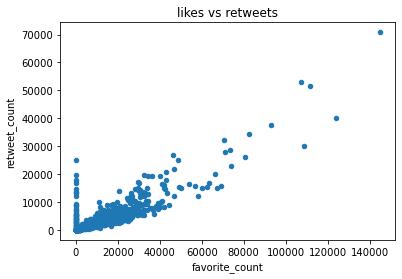

In [150]:
we_rate_dogs_archive_cleaned[['favorite_count', 'retweet_count']].plot(kind='scatter', x='favorite_count',
                                                                       y='retweet_count', title='likes vs retweets');

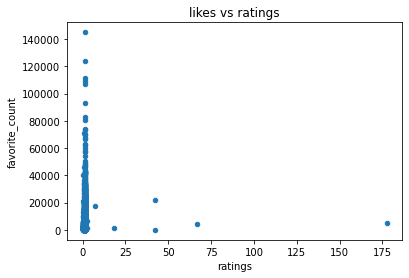

In [151]:
we_rate_dogs_archive_cleaned[['ratings', 'favorite_count']].plot(kind='scatter', x='ratings',
                                                                 y='favorite_count', title='likes vs ratings');

<AxesSubplot:title={'center':'retweet vs ratings'}, xlabel='ratings', ylabel='retweet_count'>

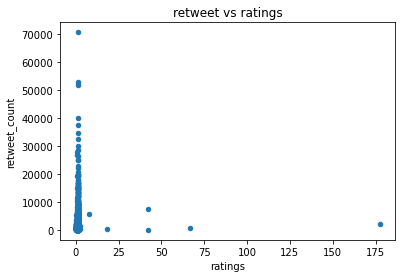

In [152]:
we_rate_dogs_archive_cleaned[['retweet_count', 'ratings']].plot(kind='scatter', 
                                                                x='ratings', y='retweet_count', title='retweet vs ratings')

In [165]:
tweets_per_year = we_rate_dogs_archive_cleaned.groupby((we_rate_dogs_archive_cleaned.timestamp.dt.year)).tweet_id.count()

tweets_per_year

timestamp
2015     689
2016    1106
2017     425
Name: tweet_id, dtype: int64

### Insights:
1. It looks like puppos has the highest ratings on average, but we can't conclude on this yet because we still have records with missing dog stages.

2. We noticed that there seem to be a strong positive correlation between the number of retweets and likes which is expected.

3. There were more tweets of dog ratings made in 2016.

### Visualization

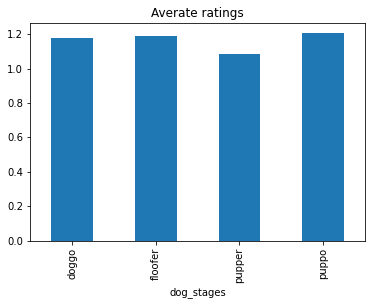

In [156]:
average_ratings_for_each_dog.plot(kind='bar', title='Averate ratings');

<AxesSubplot:title={'center':'Tweet Counts per Year'}, xlabel='timestamp'>

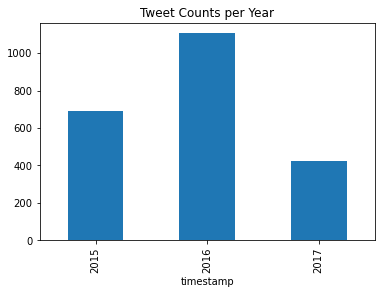

In [169]:
tweets_per_year.plot(kind='bar', title='Tweet Counts per Year')